In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = './distribution/ade20k_acc.csv'
accuracy = pd.read_csv(file_path, index_col=1)

In [3]:
selected_dist = accuracy['IoU'].sort_values()
top_limit_class = 10
sorted_selected_dist = selected_dist[:top_limit_class]

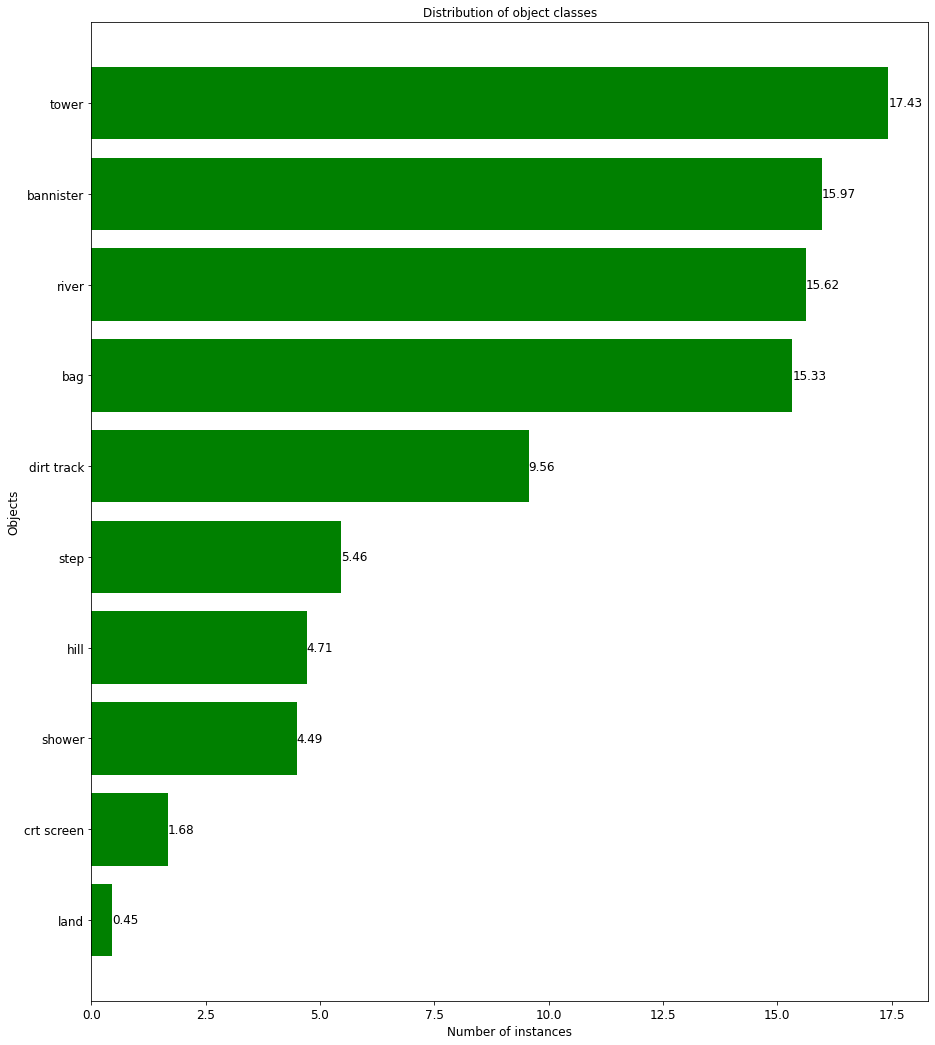

In [4]:
font_size = 12
fig, ax = plt.subplots(figsize=(15, 18))
bars = ax.barh(sorted_selected_dist.index, sorted_selected_dist.values, color='g')
ax.set_title('Distribution of object classes', fontsize=font_size)
ax.set_ylabel('Objects', fontsize=font_size)
ax.set_xlabel('Number of instances', fontsize=font_size)
ax.bar_label(bars, fontsize=font_size)
ax.tick_params(axis="x", labelsize=font_size)
ax.tick_params(axis="y", labelsize=font_size)